# PREDICTING THE LIKELIHOOD OF E-SIGNING A LOAN BASED ON FINANCIAL HISTORY

 
Lending companies work by analysing the financial history of their loan  applicants, and choosing whether or not the applicant is too risky to be given a loan. If the applicant is not, the company then determines the terms of the loan. To acquire these applicants, companies can organically receive them through their websites/apps, often with the help of advertisement compaingns. Other times, lending companies partner with peer-to-peer (P2P) lending marketplaces, in order to acquire leads of possible applicants. Some example marketplaces include Upstart, Lending Tree, and Lending club. In this project, we are going to asses the 'quality' of the loads our company receives from these marketplaces.

__Market:__ the target audience is the set of loan applicants who reached out through an intermediary marketplace.


__Product:__ A loan.


__Goal:__ Develop an model to predict for potential applicants. In this case study, potential applicants are those who reach a key part of the loan application process

### Challenge


In this Case Study we will be working for a fintech company that specializes on loan. If others low APR loans to applicants based on their financial habits, as almost all lending companies do. This company has partnered with a P2P lending marketplace that provides real-time leads (loan applicants). The  number of conversions from these leads are satisfactory.

The company tasks you with creating a model that predicts whether or nor these leads will complete the electronic signature phase of the loan application (ex.: e_signed). The company seeks to leverage this model to identify less'quality' applicants (e.g. those who are not responding to the onboarding process), and experiment with giving them different onboarding screens.

The reason for selecting the e_signing process as the response variable is due to the structure of the loan application.

The official application begins with the lead arriving into our website after we opted to acquire it. here, the applicant begins the onboarding process to apply foa a loan. The user begins to provide more financial information by going over every screen of the onboarding process. This first phase ends with the applicant providing his/her signature indicating all of the given information is correct.

Any of the following screens, in which the applicant is approved/denied and given the terms of the loan, is dependent on the company, not the applicant. Therefore the effectiveness of the onboarding is measured up to the moment the applicant stops having control of the application process.

### Data

The financial data includes personal information like age, and time employed, as well as other financial metrics. The company uses these financial data points to create risk scores based on many different risk factors.

We are iven the set of scores from algorithms built by the finance and engineering teams. Furthermor, the marketplace itself provides us with their own lead quality scores. We will leverage both sets of scores, as well as small list of personal/financial features to predict if the user is likely to respond to our current onboarding process.

In [27]:
# Importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [28]:
# Loading the dataset

df = pd.read_csv('Financial_Data.csv')

In [5]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [29]:
# Checking for nulls

df.isna().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

# EDA

In [30]:
# creating a copy dataset for Exploratory Data Analysis

df2 = df.drop(['entry_id', 'pay_schedule', 'e_signed'], axis = 1) 
df2.shape

(17908, 18)

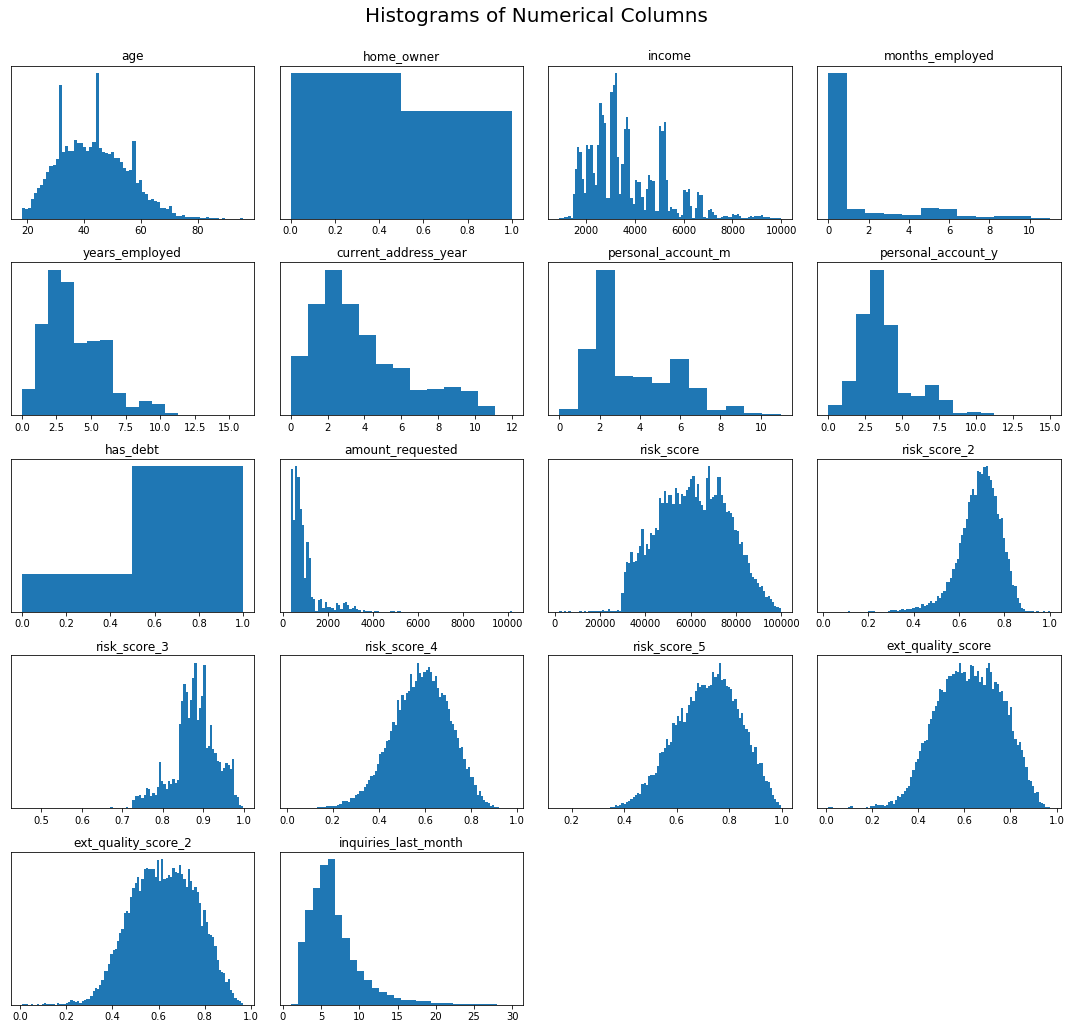

In [33]:
fig = plt.figure(figsize =(15, 15))
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)

for i in range(1, df2.shape[1] + 1):
    plt.subplot(5, 4, i) 
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
    
    vals = np.size(df2.iloc[:, i -1].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i - 1], bins = vals)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


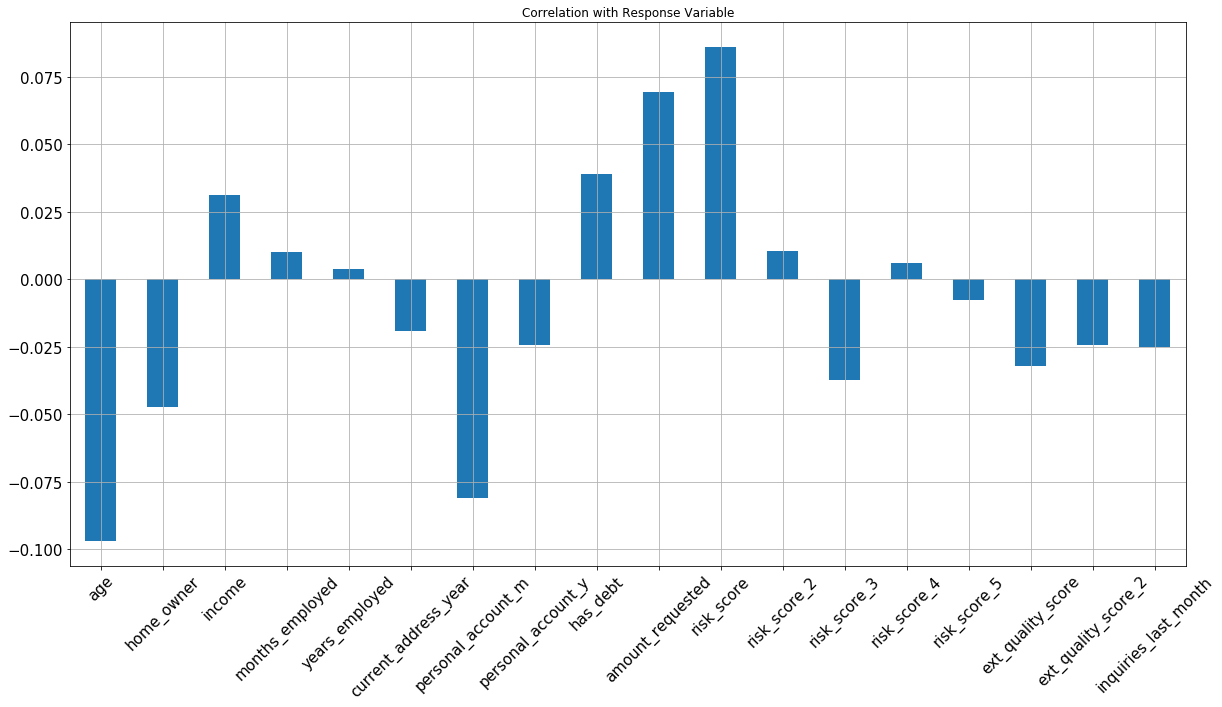

In [9]:
# Correlation between df.SPECIFIC_COLUMN  vs  df

df2.corrwith(df.e_signed).plot.bar(
    figsize = (20, 10), title = 'Correlation with Response Variable',
              fontsize = 15, rot = 45, grid = True)

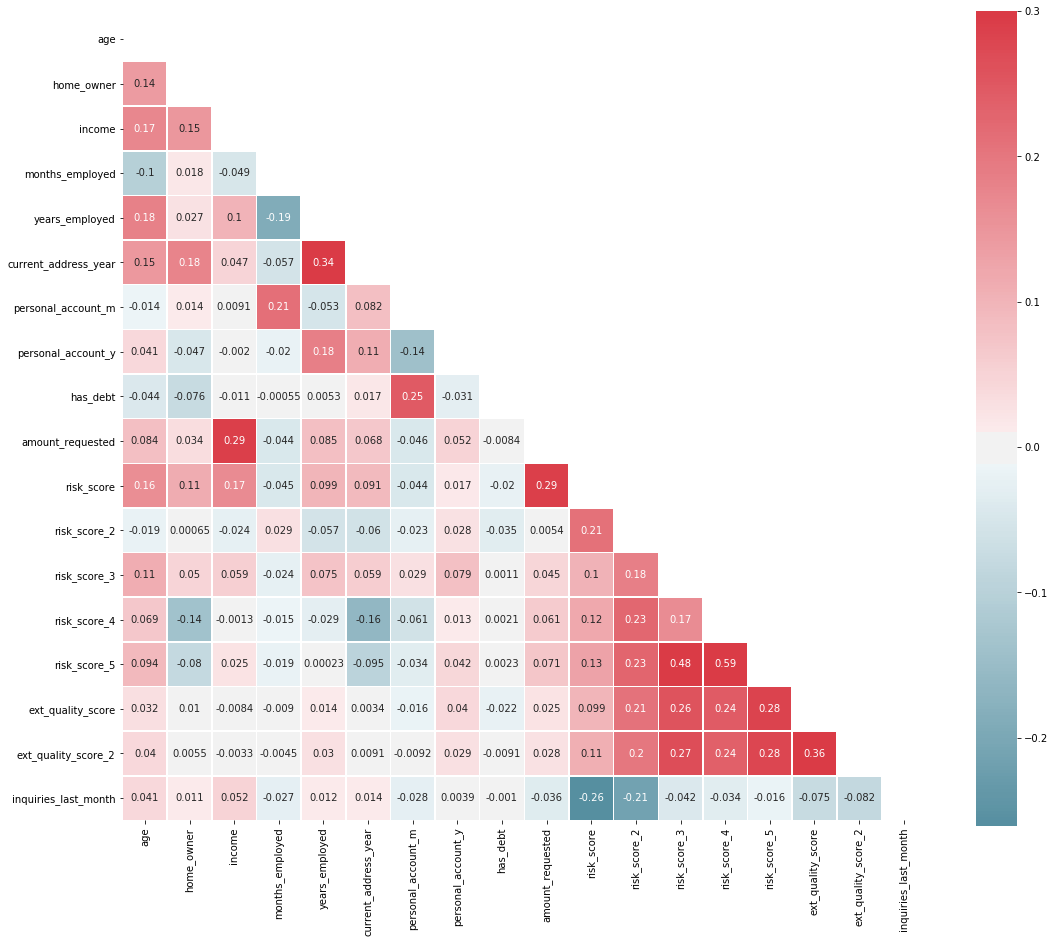

In [10]:
# Heatmap 

corr = df2.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
fig, axes = plt.subplots(1, 1, figsize = (18, 15))
cmap = sb.diverging_palette(220, 10, as_cmap = True)

sb.heatmap(corr, mask = mask, square=True, annot = True, linewidth = 0.5,
           ax = axes, cmap = cmap, vmax = 0.3, center = 0)

# FEATURE ENGINEERING


In [11]:
df = df.drop(['months_employed'], axis = 1)

In [12]:
# transforming 2 columns (month and year) into a single columns of total months

df['personal_account_months'] = ((df.personal_account_y)*12 + df.personal_account_m)

In [13]:
df = df.drop(['personal_account_y', 'personal_account_m'], axis = 1)

- Encoding Categorical Data

In [14]:
# Encoding categorical data

df = pd.get_dummies(df)
df.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [15]:
response = df['e_signed']
users    = df['entry_id']

# PRE PROCESSING

In [16]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(df.drop(['e_signed', 'entry_id'], axis = 1),
                                                    df['e_signed'], test_size = 0.2,
                                                    random_state = 0)

In [17]:
y_train.value_counts() 

1    7711
0    6615
Name: e_signed, dtype: int64

Data Set is balanced, then no need to Balance it

### Feature Scaling



In [18]:
# STANDARDIZATION 

sc_x = StandardScaler()
X_train2 = pd.DataFrame(sc_x.fit_transform(X_train)) # transforming to DataFrame
X_test2  = pd.DataFrame(sc_x.transform(X_test))      # transforming to DataFrame

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# MODEL


- Logistic Regression Model

In [19]:
# Logistic Regression Model

classifier_LR = LogisticRegression(random_state = 0, penalty = 'l2')
classifier_LR.fit(X_train, y_train)

y_pred = classifier_LR.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc =  accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Ridge)', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])

results.head()

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression (Ridge),0.562535,0.576386,0.706432,0.634817


- Support Vector Machine Model (kernel = linear)

In [20]:
# Support Vector Machine Model

classifier_smvlinear = SVC(random_state = 0, kernel = 'linear')
classifier_smvlinear.fit(X_train, y_train)

y_pred = classifier_smvlinear.predict(X_test)

print('Accuracy: %0.4f' % accuracy_score(y_test, y_pred))    # (TP + TN) / (TP + TN + FP + FN)
print('Recall: %0.4f' % recall_score(y_test, y_pred))        # focus on typeII error(FN) = TP / (TP + FN)
print('f1_score: %0.4f' % f1_score(y_test, y_pred))          # focus on typeI and typeII error = 2*((precision*recall)/precision + recall) 
print('Precision: %0.4f' % precision_score(y_test, y_pred))  # focus on typeI error(FP) = TP / (TP + FP)

acc =  accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (linear)', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])
results = results.append(model_results, ignore_index = True)

results.head()

Accuracy: 0.5681
Recall: 0.7355
f1_score: 0.6470
Precision: 0.5776


,Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression (Ridge),0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568118,0.577597,0.735477,0.647045


- Support Vector Machine (kernel = rbf)

In [21]:
# Support Vector Machine Model

classifier_smv_rbf = SVC(random_state = 0, kernel = 'rbf')
classifier_smv_rbf.fit(X_train, y_train)

y_pred = classifier_smv_rbf.predict(X_test)

print('Accuracy: %0.4f' % accuracy_score(y_test, y_pred))    # (TP + TN) / (TP + TN + FP + FN)
print('Recall: %0.4f' % recall_score(y_test, y_pred))        # focus on typeII error(FN) = TP / (TP + FN)
print('f1_score: %0.4f' % f1_score(y_test, y_pred))          # focus on typeI and typeII error = 2*((precision*recall)/precision + recall) 
print('Precision: %0.4f' % precision_score(y_test, y_pred))  # focus on typeI error(FP) = TP / (TP + FP)

acc =  accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (rbf)', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])
results = results.append(model_results, ignore_index = True)

results.head()

Accuracy: 0.5966
Recall: 0.6950
f1_score: 0.6497
Precision: 0.6099


,Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression (Ridge),0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568118,0.577597,0.735477,0.647045
2,SVM (rbf),0.596594,0.609923,0.695021,0.649697


- Random Forest Model

In [22]:
# Random Forest Classifier

classifier_RF = RandomForestClassifier(random_state = 0,
                                       n_estimators = 100,
                                       criterion = 'entropy')
classifier_RF.fit(X_train, y_train)

y_pred = classifier_RF.predict(X_test)

print('Accuracy: %0.4f' % accuracy_score(y_test, y_pred))    # (TP + TN) / (TP + TN + FP + FN)
print('Recall: %0.4f' % recall_score(y_test, y_pred))        # focus on typeII error(FN) = TP / (TP + FN)
print('f1_score: %0.4f' % f1_score(y_test, y_pred))          # focus on typeI and typeII error = 2*((precision*recall)/precision + recall) 
print('Precision: %0.4f' % precision_score(y_test, y_pred))  # focus on typeI error(FP) = TP / (TP + FP)

acc =  accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])
results = results.append(model_results, ignore_index = True)

results.head()

Accuracy: 0.6223
Recall: 0.6758
f1_score: 0.6582
Precision: 0.6416


,Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression (Ridge),0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568118,0.577597,0.735477,0.647045
2,SVM (rbf),0.596594,0.609923,0.695021,0.649697
3,Random Forest (n=100),0.622278,0.641556,0.675830,0.658247


__Observations:__

Random Forest Model showed best results among the others.
 
Next step is to optimize the parameters and apply Cross Validation

# Pos Processing

- Cross Validation

In [23]:
# K_fold Cross Validation

accuracies = cross_val_score(estimator = classifier_RF, X = X_train, y = y_train, cv = 10)

print('Random Forest Classifier Accuracy and std): %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2)) # Bias

Random Forest Classifier Accuracy and std): 0.627 (+/- 0.025)


- Hyperparameter Tunning

In [24]:
parameters = {'max_depth': [3, None],
              'max_features': [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              'bootstrap': [True, False],
              'criterion': ['entropy']}

grid_search = GridSearchCV(estimator = classifier_RF, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1) # it means we are using all cores of the computer

grid_search = grid_search.fit(X_train, y_train)

RF_best_accuracy = grid_search.best_score_
RF_best_parameters = grid_search.best_params_

print('Random Forest best accuracy: %0.2f' % RF_best_accuracy)
RF_best_parameters

Random Forest best accuracy: 0.63


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [25]:
# Predicting results after we have selected the right parameters

y_pred_grid_ = grid_search.predict(X_test)

# Classification Metrics
print('Accuracy: %0.4f' % accuracy_score(y_test, y_pred))
print('Recall: %0.4f' % recall_score(y_test, y_pred))
print('f1_score: %0.4f' % f1_score(y_test, y_pred))
print('Precision: %0.4f' % precision_score(y_test, y_pred))

acc =  accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['RF (n=100, gridSearch)', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])
results = results.append(model_results, ignore_index = True)

results.head()

Accuracy: 0.6223
Recall: 0.6758
f1_score: 0.6582
Precision: 0.6416


,Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression (Ridge),0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568118,0.577597,0.735477,0.647045
2,SVM (rbf),0.596594,0.609923,0.695021,0.649697
3,Random Forest (n=100),0.622278,0.641556,0.675830,0.658247
4,"RF (n=100, gridSearch)",0.622278,0.641556,0.675830,0.658247


# Final Results

In [26]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,1
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,1
17890,3605941,0.0,1
17901,1807355,0.0,1
